In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv('/content/drive/MyDrive/salary.csv')
df = df.drop('Unnamed: 0', axis=1)

In [64]:
df

,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary
0,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40.0,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13.0,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40.0,<=50K
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40.0,<=50K
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40.0,<=50K
...,...,...,...,...,...,...,...,...,...
25278,Local-gov,Bachelors,13,Married-civ-spouse,Transport-moving,Black,Male,40.0,<=50K
25279,Private,HS-grad,9,Married-civ-spouse,Other-service,White,Male,20.0,<=50K
25280,Private,10th,6,Married-civ-spouse,Craft-repair,White,Male,40.0,>50K
25281,Local-gov,Bachelors,13,Never-married,Prof-specialty,White,Male,50.0,>50K


In [65]:
df.isnull().sum()

workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              1
sex               1
hours-per-week    1
salary            1
dtype: int64

In [66]:
categorical_columns = ['race','sex','salary']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [67]:
numerical_columns = ['hours-per-week']
imputer_knn = KNNImputer(n_neighbors=5)
df[numerical_columns] = imputer_knn.fit_transform(df[numerical_columns])

In [68]:
df

,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary
0,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40.000000,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13.000000,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40.000000,<=50K
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40.000000,<=50K
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40.000000,<=50K
...,...,...,...,...,...,...,...,...,...
25278,Local-gov,Bachelors,13,Married-civ-spouse,Transport-moving,Black,Male,40.000000,<=50K
25279,Private,HS-grad,9,Married-civ-spouse,Other-service,White,Male,20.000000,<=50K
25280,Private,10th,6,Married-civ-spouse,Craft-repair,White,Male,40.000000,>50K
25281,Local-gov,Bachelors,13,Never-married,Prof-specialty,White,Male,50.000000,>50K


In [69]:
df.isnull().sum()

workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
hours-per-week    0
salary            0
dtype: int64

In [70]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex', 'salary']

In [71]:
label_encoder = LabelEncoder()

In [72]:
for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

In [73]:
df

,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary
0,7,9,13,4,1,4,1,40.000000,0
1,6,9,13,2,4,4,1,13.000000,0
2,4,11,9,0,7,4,1,40.000000,0
3,4,1,7,2,7,2,1,40.000000,0
4,4,9,13,2,11,2,0,40.000000,0
...,...,...,...,...,...,...,...,...,...
25278,2,9,13,2,15,2,1,40.000000,0
25279,4,11,9,2,9,4,1,20.000000,0
25280,4,0,6,2,3,4,1,40.000000,1
25281,2,9,13,4,11,4,1,50.000000,1


In [75]:
features_for_clustering = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'salary']

In [76]:
X = df[features_for_clustering]

In [77]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

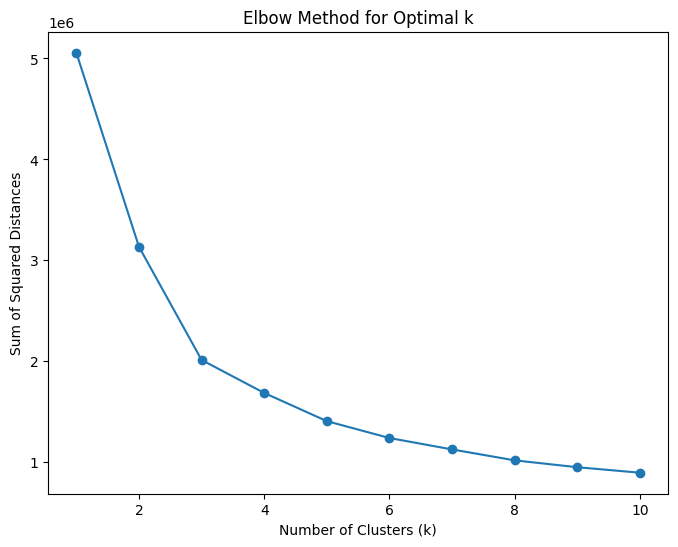

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [80]:
features_for_clustering = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'salary']

In [81]:
X = df[features_for_clustering]

In [85]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [87]:
df['cluster'] = labels

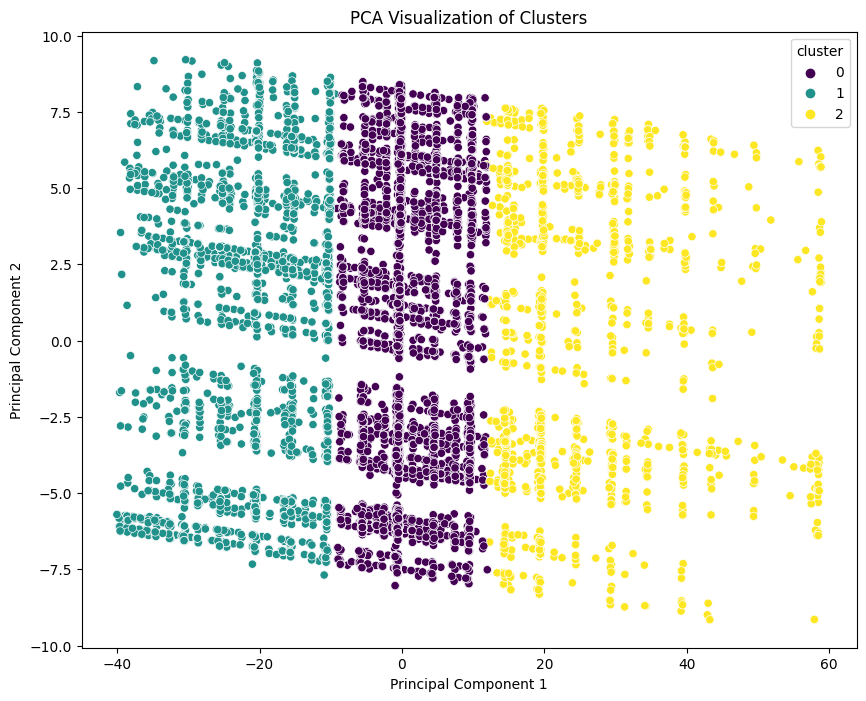

In [88]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', legend='full')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()